# Application of Machine Learning Techniques in Credit Card Fraud Detection

> **Logistic Regression**

This model along with the other selected models is used for binary classification, where the output prediction can only take one of two possible values for example 1 or 0, true or false and in this case fraudulent or no fraud. It is one of the most popular algorithms, and uses a logistic function also called the sigmoid function. Inputted values (x) are combined linearly using weights or coefficient values to predict an output value (y). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris 
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
print('All libraries imported')

All libraries imported


In [3]:
from pandas_profiling import ProfileReport

In [4]:
data = pd.read_csv('creditcard.csv')

In [1]:
#ProfileReport(data, title="Pandas Profiling Report")

In [15]:
data.shape

(284807, 31)

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

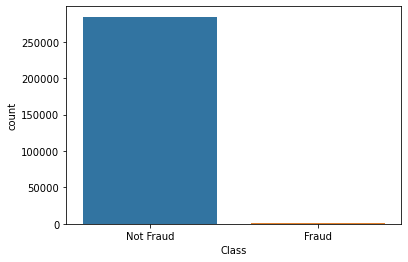

In [18]:
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [19]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Out of 284807 cases, there are 492 cases of fruad in this data set
Which is 0.17%

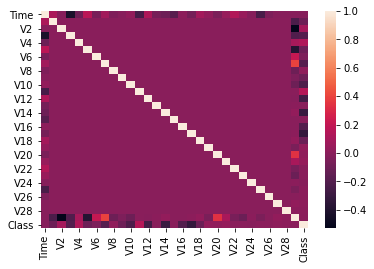

In [20]:
sns.heatmap(data.corr(), annot = False)
plt.show()

In [21]:
correlations = data.corr()['Class'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(6))

Most Positive Correlations: 
 V19      0.034783
V21      0.040413
V2       0.091289
V4       0.133447
V11      0.154876
Class    1.000000
Name: Class, dtype: float64

Most Negative Correlations: 
 V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
Name: Class, dtype: float64


# Data Pre-processing

## Data Standardization

Standardizing the features refers to rescaling the features so that they will have the properties of
a standard normal distribution with a mean of 0 and standard deviation of 1. I performed standardization on the 'Amount' feature using
StandardScalar in the scikit-learn library.

### Before standardization

In [22]:
data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
data[['Amount']] = StandardScaler().fit_transform(data[['Amount']])

### After standardization

In [24]:
data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

## Data Splittig using Random seed

A random seed is used to ensure the same data split each time the code is excecuted. 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = data.drop("Class", axis =1)
y = data[["Class"]]

In [27]:
x.shape

(284807, 30)

In [28]:
y.shape

(284807, 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) # x = features, y = target

In [30]:
x_train.shape

(199364, 30)

In [31]:
x_test.shape

(85443, 30)

In [32]:
y_train.shape

(199364, 1)

In [33]:
y_test.shape

(85443, 1)

## Data Resampling

The dataset is highly unbalanced. To tackle this problem, I used resampling techniques such as: <br>

-  **Random Undersampling**
-  **Random Oversampling** .
-  **SMOTE**  <br>
-  **Under-Sampling: Tomek Links Removal**  
-  **Combination of SMOTE and undersampling**<br>

Implemented these on the training data separately to make it balanced <br>

However as a control we will run the model first with no resmapling techiniques and ananlyze the results, this will be done with the other algorithms. 

 

## 1. Linear Regresssion with no Resampling

## Hyper parameter search for Logistic Regression

Hyperparameter is a configuration that is external to the model whose value cannot be estimated
from the training data. It should not be confused with the model parameter as a
model parameter is a configuration that is internal to the model, and its value can be estimated
during the training process. 

In the logistic regression model, the regularization parameter ’C’ is an important hyperparameter
that needs to be tuned carefully. The value of C directly affects the generalization ability of the
model. For instance, for large values of C, the model tends to overfit the data, and for small
values of C, the model tends to underfit the data. Given an initial list of C values, we performed
GridSearchCV technique on the resampled training data to find the best C parameter for the
logistic regression model.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC

In [35]:
##clf = GridSearchCV(estimator, param_grid, 10, scoring) #(estimator, param_grid, cv(cross validation number for k), scoring)

In [36]:
lg = LogisticRegression(max_iter= 600)

In [37]:
logistic_params = {'C':[x / 10.0 for x in range(0, 15, 1) ]}

In [33]:
clf = GridSearchCV(lg, logistic_params, cv = 10, scoring ='accuracy')

In [696]:
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=600),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4]},
             scoring='accuracy')

In [697]:
print(clf.best_params_)

{'C': 0.2}


From the gridsearch 10 fold cross validation, the best C parameter is 0.2. 
With this value, we can then proceed to build and evaluate the regression model. 

### Fitting the model

In [698]:
classifier1 = LogisticRegression(C = 0.2, max_iter = 600)
model1 = classifier1.fit(x_train, y_train)

params = model1.get_params()
params

{'C': 0.2,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 600,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Prints out all the tunable parameters (values above are the default values), the value of C directly affects the generalization ability of the model. For instance, for large values of C, the model tends to overfit the data, and for small
values of C, the model tends to underfit the data. Therefore, the value of C needs to carefully selected by using GridSearchCV.

For this instance, the model exceeded the max iter reached so a new value will have to be specified.

## Evaluation

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [700]:
prediction1 = model1.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction1))

Accuracy Score:  0.9985838512224524


### Confusion Matrix

In [40]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

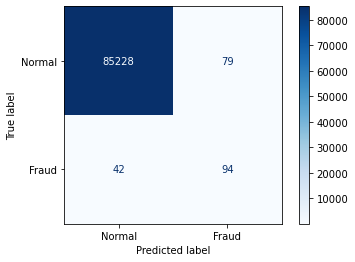

In [702]:
plot_confusion_matrix(model1, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [703]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1, digits=4)) 

              precision    recall  f1-score   support

           0     0.9995    0.9991    0.9993     85307
           1     0.5434    0.6912    0.6084       136

    accuracy                         0.9986     85443
   macro avg     0.7714    0.8451    0.8039     85443
weighted avg     0.9988    0.9986    0.9987     85443



### Precision-Recall Curve

In [782]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [783]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction1)

In [784]:
precision

array([0.0015917, 0.5433526, 1.       ])

In [785]:
recall

array([1.        , 0.69117647, 0.        ])

In [786]:
thresholds

array([0, 1], dtype=int64)

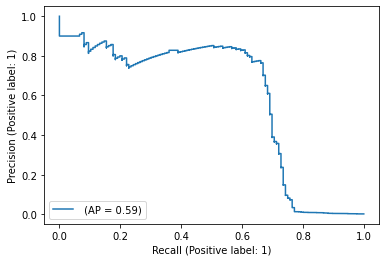

In [788]:
plot_precision_recall_curve(model1, x_test, y_test, name = '')
plt.show()

Area Under Precision Recall Curve = 0.59

In [710]:
model1.predict_proba(x_test)

array([[1.07203135e-12, 1.00000000e+00],
       [9.97823961e-01, 2.17603898e-03],
       [9.84393573e-01, 1.56064273e-02],
       ...,
       [9.93172338e-01, 6.82766188e-03],
       [9.99998424e-01, 1.57596519e-06],
       [9.99797262e-01, 2.02738206e-04]])

In [711]:
import plotly.express as px

In [712]:
#fig = px.line(x = recall[:-1], y = precision[:-1], hover_name = thresholds)
#fig.update_xaxes(title = 'Recall')
#fig.update_yaxes(title = 'Precision')
#fig

### Reciever Operating Characteristic Curve (ROC)

In [713]:
from sklearn.metrics import plot_roc_curve, roc_curve

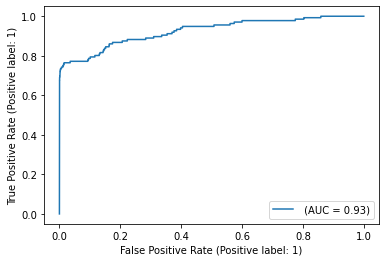

In [789]:
plot_roc_curve(model1, x_test, y_test, name = '')
plt.show()

Area under ROC (AUROC)  = 0.93

# 2. Linear Regression with Random Under Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable

In [37]:
from imblearn import under_sampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
rus = RandomUnderSampler(random_state = 0)
x_under, y_under = rus.fit_resample(x_train, y_train)

In [40]:
x_under.shape

(712, 30)

In [41]:
y_under.shape

(712, 1)

In [42]:
y_under.Class.value_counts()

0    356
1    356
Name: Class, dtype: int64

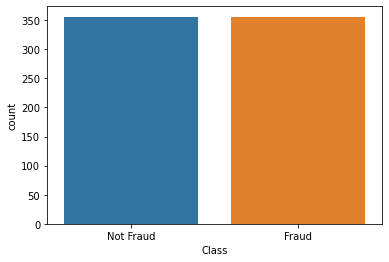

In [43]:
g = sns.countplot(y_under['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

Both majority and minority samples are now equal with 356 instances

### Parameter search 

Using the already created GridSearchCV, we will fit it with the new under sampled feature and target variables and find the best C values from the initial list above

In [44]:
clf.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=600),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4]},
             scoring='accuracy')

In [45]:
print(clf.best_params_)

{'C': 0.6}


From the gridsearch 10 fold cross validation, the best C parameter is 0.6 for the under sampled data. 
With this value, we can then proceed to build and evaluate the regression model. 

### Fitting the Model

In [46]:
classifier2 = LogisticRegression(C = 0.6, max_iter = 600)
model2 = classifier2.fit(x_under, y_under)

### Evaluation

In [50]:
prediction2 = model2.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction2))

Accuracy Score:  0.9622321313624288


### Confusion Matrix

In [53]:
confusion_matrix(y_test, prediction2)

array([[82091,  3216],
       [   11,   125]], dtype=int64)

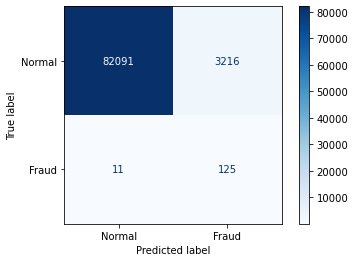

In [54]:
plot_confusion_matrix(model2, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [728]:
print(classification_report(y_test, prediction2, digits = 4))

              precision    recall  f1-score   support

           0     0.9999    0.9623    0.9807     85307
           1     0.0374    0.9191    0.0719       136

    accuracy                         0.9622     85443
   macro avg     0.5186    0.9407    0.5263     85443
weighted avg     0.9983    0.9622    0.9793     85443



### Precision-Recall Curve

In [729]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction2)

In [730]:
precision

array([0.0015917 , 0.03741395, 1.        ])

In [731]:
recall

array([1.        , 0.91911765, 0.        ])

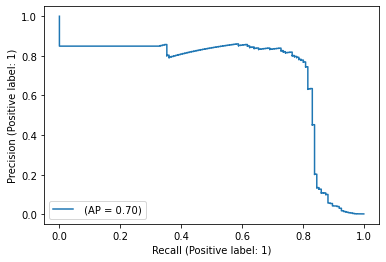

In [732]:
plot_precision_recall_curve(model2, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

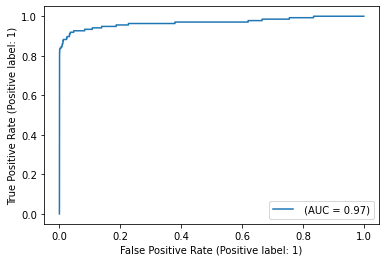

In [733]:
plot_roc_curve(model2, x_test, y_test, name = '')
plt.show()

Area under ROC (AUROC)  = 0.97

# 3. Linear Regression with Random Over Sampling

In [734]:
from imblearn.over_sampling import RandomOverSampler

In [735]:
ros = RandomOverSampler(random_state = 0)
x_over, y_over = ros.fit_resample(x_train,y_train)

In [736]:
x_over.shape

(398016, 30)

In [737]:
y_over.shape

(398016, 1)

In [738]:
y_over.Class.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [739]:
y_train.Class.value_counts()

0    199008
1       356
Name: Class, dtype: int64

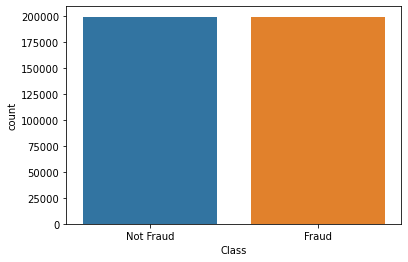

In [740]:
g = sns.countplot(y_over['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter Search

In [741]:
clf.fit(x_over, y_over)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=600),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4]},
             scoring='accuracy')

In [742]:
print(clf.best_params_)

{'C': 0.1}


### Fitting the model

In [743]:
classifier3 = LogisticRegression(C = 0.1, max_iter = 600)
model3 = classifier3.fit(x_over, y_over)

### Evaluation

In [744]:
prediction3 = model3.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction3))

Accuracy Score:  0.9611553901431363


### Confusion Matrix 

In [745]:
confusion_matrix(y_test, prediction3)

array([[81999,  3308],
       [   11,   125]], dtype=int64)

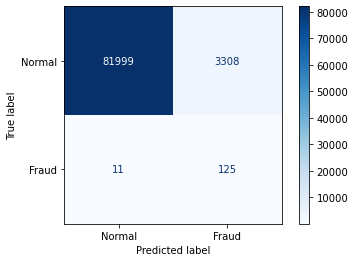

In [746]:
plot_confusion_matrix(model3, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification report

In [747]:
print(classification_report(y_test, prediction3, digits = 4))

              precision    recall  f1-score   support

           0     0.9999    0.9612    0.9802     85307
           1     0.0364    0.9191    0.0700       136

    accuracy                         0.9612     85443
   macro avg     0.5181    0.9402    0.5251     85443
weighted avg     0.9983    0.9612    0.9787     85443



### Precision-Recall Curve

In [748]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction3)

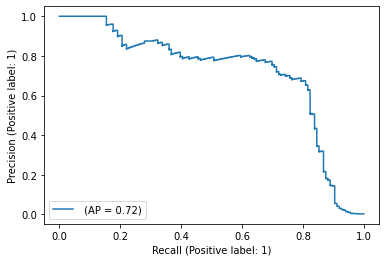

In [749]:
plot_precision_recall_curve(model3, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

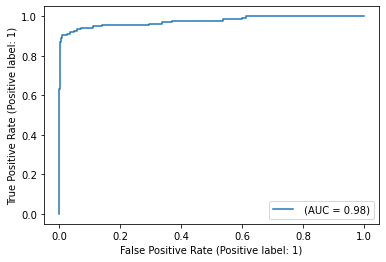

In [750]:
plot_roc_curve(model3, x_test, y_test, name = '')
plt.show()

# 4. Linear Regression with  Synthetic Minority Oversampling Technique         SMOTE  

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

SMOTE (Synthetic Minority Over-sampling Technique) is a type of over-sampling procedure that is used to correct the imbalances in the groups. This technique creates new data instances of the minority groups by copying existing minority instances and making small changes to them. This makes SMOTE great at amplifying signals that already exist in the minority groups, but won’t create new signals for those groups.

In [41]:
from imblearn.over_sampling import SMOTE 

Now, when dealing with synthetic data, the first rule is:
Don’t put synthetic data in your testing data!
We want to implement our model on live data, so we want to see how our model will perform on real data and not the synthetic data that we have created. This means that we can only add the synthetic data to the training set. We can do that with the following code:

In [42]:
smt = SMOTE(random_state = 0)

# fit predictor and target variable
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)
print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_train_SMOTE.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    199008
1    199008
Name: Class, dtype: int64


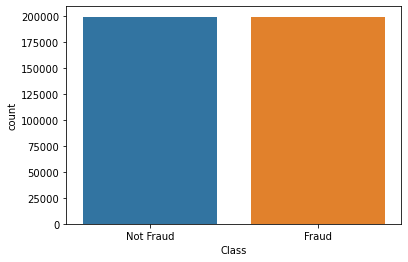

In [753]:
g = sns.countplot(y_train_SMOTE['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

From here we can train our model on the training data with SMOTE included.
Note that we are using the same logistic regression model created earlier, just fitting it with the new training data. 

### Parameter search

In [754]:
clf.fit(x_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=600),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4]},
             scoring='accuracy')

In [755]:
print(clf.best_params_)

{'C': 0.1}


In [43]:
classifier4 = LogisticRegression(C = 0.1, max_iter = 600)
model4 = classifier4.fit(x_train_SMOTE, y_train_SMOTE)

### Evaluation

In [45]:
prediction4 = model4.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction4))

Accuracy Score:  0.9801739171143335


### Confusion Matrix

In [46]:
confusion_matrix(y_test, prediction4)

array([[83625,  1682],
       [   12,   124]], dtype=int64)

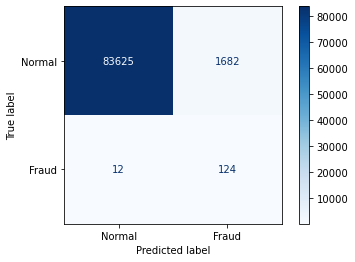

In [47]:
plot_confusion_matrix(model4, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [758]:
print(classification_report(y_test, prediction4, digits = 4))

              precision    recall  f1-score   support

           0     0.9999    0.9803    0.9900     85307
           1     0.0687    0.9118    0.1277       136

    accuracy                         0.9802     85443
   macro avg     0.5343    0.9460    0.5588     85443
weighted avg     0.9984    0.9802    0.9886     85443



### Precision-Recall Curve

In [759]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction4)

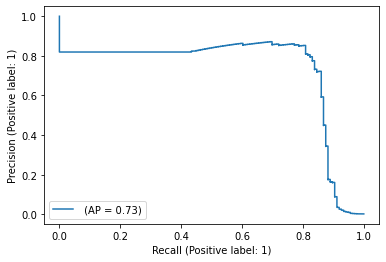

In [760]:
plot_precision_recall_curve(model4, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

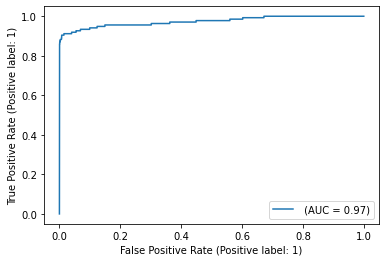

In [761]:
plot_roc_curve(model4, x_test, y_test, name = '')
plt.show()

# 5. Linear Regression Tomek links removal 

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other

In the code below, we’ll use ratio='majority' to resample the majority class.


In [762]:
# import library
from imblearn.under_sampling import TomekLinks

In [763]:
#TomekLinks?

In [764]:
t1 = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_t1, y_t1 = t1.fit_resample(x_train, y_train)

print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_t1.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    198995
1       356
Name: Class, dtype: int64


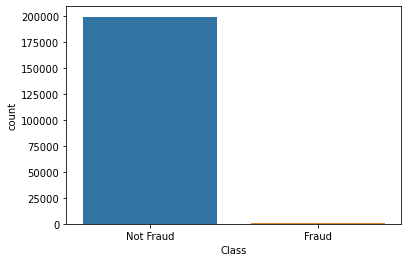

In [765]:
g = sns.countplot(y_t1['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter Search

In [766]:
clf.fit(x_t1, y_t1)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=600),
             param_grid={'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0, 1.1, 1.2, 1.3, 1.4]},
             scoring='accuracy')

In [767]:
print(clf.best_params_)

{'C': 0.6}


### Fitting the model

In [768]:
classifier5 = LogisticRegression(C = 0.1, max_iter = 600)
model5 = classifier5.fit(x_t1, y_t1)

### Evaluation

In [769]:
prediction5 = model5.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction5))

Accuracy Score:  0.9991456292499094


### Confusion Matrix

In [770]:
confusion_matrix(y_test, prediction5)

array([[85289,    18],
       [   55,    81]], dtype=int64)

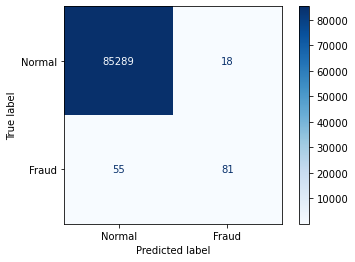

In [771]:
plot_confusion_matrix(model5, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [772]:
print(classification_report(y_test, prediction5, digits = 4))

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85307
           1     0.8182    0.5956    0.6894       136

    accuracy                         0.9991     85443
   macro avg     0.9088    0.7977    0.8445     85443
weighted avg     0.9991    0.9991    0.9991     85443



### Precision Recall Curve

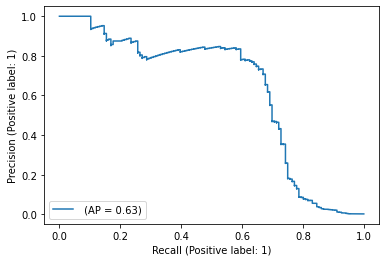

In [773]:
plot_precision_recall_curve(model5, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve

In [774]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

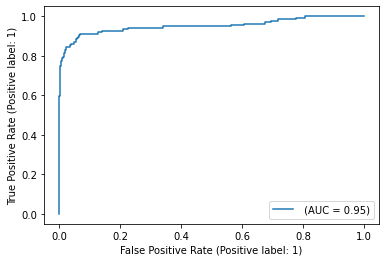

In [775]:
plot_roc_curve(model5, x_test, y_test, name = '')
plt.show()
#plt.plot([0,1], [0,1], c='b')